# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


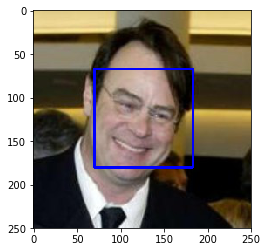

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__
The algorithm detects 98% of human faces in 100 human images
and 1% percent of dog faces in 100 dog images
The performance looks great in 100 images

In [51]:
from tqdm import tqdm_notebook as tqdm

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
human_counter = 0
dog_counter = 0
for ii, (h_f, d_f) in enumerate(tqdm(zip(human_files_short, dog_files_short))):
    human_face = face_detector(h_f)
    dog_face = face_detector(d_f)
    if human_face:
        human_counter += 1
    elif dog_face:
        dog_counter += 1
    #if ii==9:
print('human face detected {} with {}% percformance'.format(human_counter, human_counter/100 * 100))
print('chance for not detecting dog face is {}%'.format(dog_counter/100 * 100))


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


human face detected 98 with 98.0% percformance
chance for not detecting dog face is 1.0%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:04<00:00, 124572843.77it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
from PIL import Image
import torchvision.transforms as transforms

#process the image first before use with this helper function
def process_image(img_path):
     ## Load and pre-process an image from the given img_path
    img_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                        transforms.ToTensor(),
                                        transforms.Normalize((0.485, 0.456, 0.406),
                                                              (0.229, 0.224, 0.225))
                                       ])
    image = Image.open(img_path)
    
   
    #transform an image
    image = img_transform(image).unsqueeze(0)
    
    return image


def VGG16_predict(img_path):
    
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
   
    ## Load and pre-process an image from the given img_path
    image = process_image(img_path)
    
    ## Return the *index* of the predicted class for that image
    if use_cuda:
        image = image.cuda()
        
    out = VGG16(image)
    ps = torch.exp(out)
    #get the prediction with the class ignored
    _, prediction = torch.topk(ps, 1)
    
    return prediction # predicted class index


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    
    pred = VGG16_predict(img_path)
    
    if pred.item() in range(151, 269):
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
low of 95.0% and high of 100.0% performance, it detected 100 dogs out 100 dog images and 
0.0% of human image is detected out of 100 human images . this is so reasonable given how VGG net 
detect face features with 98% accuracy, it has a pretrained optimal weights to identify either, or


In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_det, dog_det = [0,0]

for ii, (h_file, d_file) in tqdm(enumerate(zip(human_files_short, dog_files_short))):
    dog = dog_detector(d_file)
    human = dog_detector(h_file)
    if dog:
        dog_det += 1
    elif human:
        human_det += 1
    
print("{}% of dog in dog images of {}".format(dog_det * len(dog_files_short) / len(dog_files_short), len(dog_files_short)))
print("{}% of dog in human images of {}".format(human_det * len(human_files_short) / len(human_files_short), len(human_files_short)))


HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))


100.0% of dog in dog images of 100
0.0% of dog in human images of 100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
#helper display function
def imshow(image, ax=None, title=None, norm=[[0.485, 0.456, 0.406],[0.229, 0.224, 0.225]]):
    if ax is None:
        fig, ax = plt.subplots()
    if title:
        plt.title(title)
    # PyTorch tensors assume the color channel is first
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array(norm[0])
    std = np.array(norm[0])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1
    
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax


(3, 224, 224)


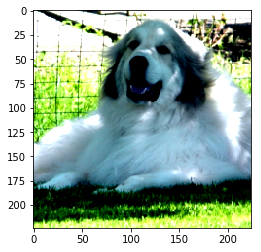

In [9]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 32

data = '/data/dog_images/'
train = os.path.join(data, 'train')
test = os.path.join(data, 'test')
valid = os.path.join(data, 'valid')

#Preprocessing 
#training and validation data transformation with Augmentation
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

#actual test data transformation, without augmentation
test_transform = transforms.Compose([transforms.Resize(225),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
#downloading the datasets
train_data = datasets.ImageFolder(train, train_transform)
valid_data = datasets.ImageFolder(valid, train_transform)
test_data =  datasets.ImageFolder(test, test_transform)

#loading the generator

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

loaders_scratch = {'train':trainloader, 'valid':validloader, 'test':testloader}

image, label= next(iter(loaders_scratch['test']))
img = image[0].numpy()
imshow(img, norm = [[0.5,0.5,0.5], [0.5,0.5,0.5]])
print(img.shape)



**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
1. I've Randomly resize the training images to create more variation in which a network would learn from, and square all my images (224), I chose to resize all the images to keep them uiniform so the variation factor would only be the hyperparameters not the image dimensions.

2. Yes! I've used image Augmentation(shift of position) that's flip and rotation to feed my network with different positional variations which might positively affect the performance of the network later, if given a shift image with the same sort of style, it'll have it's weights optimized on it already, so it won't have a hard time to converge it.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [10]:
#create Weight initialization function to initialize weights explicity
def weights_init_scratch(m):
    '''m: Module with random weights
       and explicilty initialize the weight using normal distribution.'''
    
    module_classname = m.__class__.__name__
    # for every Linear layer in a model
    if module_classname.find('Linear') != -1:
        mean = 0
        in_features = m.in_features
        std = 1/np.sqrt(in_features)
        # initialize module's weights using a normal distribution
        m.weight.data.normal_(mean, std)
        # m.bias.data should be 0
        m.bias.data.fill_(0)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, weight_init=None):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #set the kernel size and stride to 2 and padding will result to 1 to keep spatial output volume
        
        #(sees 244x244x3 tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        
        #sees (122x122x16 tensor) Kernel and stride of 3, padding 2
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        
        #sees (56x56x32 tensor) kernel size of 3 and padding of 1 crease the spatial output volume on the later layers
        self.conv3 = nn.Conv2d(32, 64, 3, padding = 1)
        
        #define pooling layer with downsample of 2
        self.pool = nn.MaxPool2d(2,2)
        
        #define Linear transformation
        #sees (28x28x64) 
        self.fc1 = nn.Linear(64*28*28, 1024)
        self.fc2 = nn.Linear(1024, 133)
        
        #define dropout
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, x):
        ## Define forward behavior
        #add sequence of convolution with pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        #flatten the image (input)
        x = x.view(-1, 64*28*28)
        
        #pass input through sequence of linear layers and dropouts
        x = self.dropout(F.relu(self.fc1(x)))
        
        #don't add relu function as softmax will be added using the crossentropyloss
        x = self.dropout(self.fc2(x))
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
#initialize the weights.
model_scratch.apply(weights_init_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
steps 1. Used three layers with last layer with depth of 64, they are deep enough given the data size and the need for efficiency. step 2. Defined the kernels size, stride and padding in a sense where they minimally decrease the spatial output volume to keep the number of parameters optimals. step 4. Defined pooing layer using Maxpooling to shrink the size with downsample of 2, to keep most of the relevant information. step 5. Add dropout to prevent linear layers from overfitting(0.4) step 6. add max number of linear layer of 3 which later change to 2 linear layer, because of overfitting. step 7. initialized linear layer's weights using normal distribution in respect to the input features instead of default initialization. It made a huge different.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [12]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.008, momentum=0.8)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [23]:
from PIL import ImageFile

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in tqdm(range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            #clean the commulated gradients
            optimizer.zero_grad()
            ## find the loss and update the model parameters accordingly
            score = model(data)
            #calculate the loss
            loss = criterion(score, target)
            #perform backward pass
            loss.backward()
            #update the weight steps
            optimizer.step()
            #accumulate the training loss

            ## record the average training loss, using something like
            #train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            #run through forward pass    
            output = model(data)
            v_loss = criterion(output, target)
            ## update the average validation loss
            #train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (v_loss.data - valid_loss))
                                       
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print("Validation loss decreaseing {:.6f}-->{:6f} Saving the model..".format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
    # return trained model
    return model

ImageFile.LOAD_TRUNCATED_IMAGES = True


In [45]:
# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

HBox(children=(IntProgress(value=0), HTML(value='')))

Epoch: 1 	Training Loss: 4.881536 	Validation Loss: 4.832925
Validation loss decreaseing inf-->4.832925 Saving the model..
Epoch: 2 	Training Loss: 4.821130 	Validation Loss: 4.736949
Validation loss decreaseing 4.832925-->4.736949 Saving the model..
Epoch: 3 	Training Loss: 4.771755 	Validation Loss: 4.722067
Validation loss decreaseing 4.736949-->4.722067 Saving the model..
Epoch: 4 	Training Loss: 4.724927 	Validation Loss: 4.634645
Validation loss decreaseing 4.722067-->4.634645 Saving the model..
Epoch: 5 	Training Loss: 4.700912 	Validation Loss: 4.604043
Validation loss decreaseing 4.634645-->4.604043 Saving the model..
Epoch: 6 	Training Loss: 4.672387 	Validation Loss: 4.589789
Validation loss decreaseing 4.604043-->4.589789 Saving the model..
Epoch: 7 	Training Loss: 4.643333 	Validation Loss: 4.577717
Validation loss decreaseing 4.589789-->4.577717 Saving the model..
Epoch: 8 	Training Loss: 4.626854 	Validation Loss: 4.557050
Validation loss decreaseing 4.577717-->4.557050 

In [14]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt', map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [64]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(tqdm((loaders['test']))):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))



In [39]:
#call test function  
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

HBox(children=(IntProgress(value=0, max=27), HTML(value='')))


Test Loss: 3.394794


Test Accuracy: 22% (190/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders

image_size = 224

batch_size = 32

data = '/data/dog_images/'
train = os.path.join(data, 'train')
test = os.path.join(data, 'test')
valid = os.path.join(data, 'valid')

norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

#defining the transform and augmenting the data

train_transform = transforms.Compose([
                                     transforms.Resize(256),
                                     transforms.RandomRotation(10),
                                     transforms.CenterCrop(image_size),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(norm_mean,
                                                        norm_std)])

#defining test transform without data augmentation
test_transform = transforms.Compose([
                                     transforms.Resize(256),
                                     transforms.CenterCrop(image_size),
                                     transforms.ToTensor(),
                                     transforms.Normalize(norm_mean,
                                                          norm_std)])

valid_transform = transforms.Compose([transforms.Resize(256),
                                       transforms.CenterCrop(image_size),
                                       transforms.ToTensor(),
                                       transforms.Normalize(norm_mean, 
                                                            norm_std)])

train_data = datasets.ImageFolder(train, transform = train_transform)
valid_data = datasets.ImageFolder(valid, transform = valid_transform)
test_data = datasets.ImageFolder(test, transform = test_transform)

data_transfer = {'train':train_data, 'valid':valid_data, 'test':test_data}

data = [train_data, valid_data, test_data]
keys = ['train', 'valid', 'test']
loaders_transfer = {i:torch.utils.data.DataLoader(j, batch_size=batch_size, shuffle=True) for i,j in zip(keys, data)}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [15]:
def weights_init_transfer(m):
    class_n = m.__class__.__name__
    if class_n.find('Linear') != -1:
        mean = 0
        std = 1/np.sqrt(m.in_features)
        m.weight.data.normal_(mean, std)
        m.bias.data.fill_(0)

In [16]:
class classifier(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, input_unit, output_unit=133, weight_init=None, ):
        super(classifier, self).__init__()
        ## Define classifier
        self.input_unit = input_unit
        self.fc1 = nn.Linear(self.input_unit, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, output_unit)
        
        self.dropout = nn.Dropout(0.5)
        
    def forward(self, x):
        ## Define forward behavior
    
        #flatten the image (input)
        x = x.view(-1, self.input_unit)
        #pass input through sequence of linear layers and dropouts
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        #don't add relu function as softmax will be added using the crossentropyloss
        x = self.dropout(self.fc3(x))
        
        return x

import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

model_transfer = models.resnet152(pretrained=True)

#freeze the parameters()
for par in model_transfer.parameters():
    par.requires_grad = False
c=0
for child in model_transfer.children():
    c+=1
    if c >= 9:
        #freeze the weights of the lower layers except the fully connected layer which is the 10th layer
        for par in child.parameters():
            par.requires_grad = True


#remove the last linear layer and replace it with my own linear layer.(considering the data are small and similar)
#get the pretrained network's input unit
in_puts = model_transfer.fc.in_features

#replace the fully connected layer with the new one

new_fcl = classifier(in_puts)

#new_fcl = nn.Linear(in_puts, 133)

model_transfer.fc = new_fcl

#Randomly initialize the weight of the last fully connected layers.
model_transfer.apply(weights_init_transfer) 

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
100%|██████████| 241530880/241530880 [00:01<00:00, 122672665.74it/s]


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I choose resnet152 model as it looks to be performing better in top error chart in torchvison and a little bit lighter than most of the models but not all.
The data seems to be small, so I'll freeze the weight of pretrained model except, the last convolutional and fully connected layers (which I'll create).
replace the last linear layer with my own.
Initialize the linear layer's weights with normal distribution in respect to the input data.
used CrossEntropyLoss which gives me two in one advantages, and some lower learning rate.
I chose SGD optimizer with momentum, because it gives some advantage of bouncing around the local minumue might lead to getting momentum toward the global minimume.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [61]:
from torch.optim import lr_scheduler as lr_sc

criterion_transfer = nn.CrossEntropyLoss()
lr = 0.003
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr, momentum=0.8)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [24]:
# train the model
n_epochs = 70
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

HBox(children=(IntProgress(value=0, max=70), HTML(value='')))

Epoch: 1 	Training Loss: 4.903919 	Validation Loss: 4.813878
Validation loss decreaseing inf-->4.813878 Saving the model..
Epoch: 2 	Training Loss: 4.802709 	Validation Loss: 4.646449
Validation loss decreaseing 4.813878-->4.646449 Saving the model..
Epoch: 3 	Training Loss: 4.669187 	Validation Loss: 4.391281
Validation loss decreaseing 4.646449-->4.391281 Saving the model..
Epoch: 4 	Training Loss: 4.491480 	Validation Loss: 4.063117
Validation loss decreaseing 4.391281-->4.063117 Saving the model..
Epoch: 5 	Training Loss: 4.305210 	Validation Loss: 3.747999
Validation loss decreaseing 4.063117-->3.747999 Saving the model..
Epoch: 6 	Training Loss: 4.140966 	Validation Loss: 3.480655
Validation loss decreaseing 3.747999-->3.480655 Saving the model..
Epoch: 7 	Training Loss: 4.026899 	Validation Loss: 3.229159
Validation loss decreaseing 3.480655-->3.229159 Saving the model..
Epoch: 8 	Training Loss: 3.896148 	Validation Loss: 2.993914
Validation loss decreaseing 3.229159-->2.993914 

In [17]:
# load the model that got the best validation accuracy (uncomment the line below)
#little bit modified because I load my model in machines with no Cuda.
model_transfer.load_state_dict(torch.load('model_transfer.pt', map_location='cpu'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [65]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

HBox(children=(IntProgress(value=0, max=27), HTML(value='')))


Test Loss: 0.748038


Test Accuracy: 86% (725/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [20]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    model_transfer.cpu()
    
    image = process_image(img_path)
    
    out = model_transfer(image)
    
    pred = out.data.max(1, keepdim=True)[1]

    return class_names[pred]


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [21]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def display(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    #Check if dog or human face exists
    
    #check if dog or human exist in the image and return the dog breed or resenble of human
    if dog_detector(img_path): #if dog exists, return the prediction of the breed
        dog_breed = predict_breed_transfer(img_path)
        title = 'A dog is detected and its breed is '+dog_breed
        img = cv2.imread(img_path)
        print(title)
        display(img_path)
    
    elif face_detector(img_path): #if human exists, return the prediction of dog resemble
        dog_resemble = predict_breed_transfer(img_path)
        title = 'hello human'
        user_promt = title+"\nI think you look like a dog breed called "+dog_resemble
        print(user_promt)
        display(img_path)
    
    else: #if neither is detected
        title = "There\'s no dog or human detected in the image"
        print(title)
        display(img_path)
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
1. would use another pretrained model, which may take less training time and resouces with a low accuracy.
2. would try learning rate decay, using reschedulers or any learning deacy methods.
3. Would try different optimizer like adam, and the rest out there which may improve the accuracy

A dog is detected and its breed is Dachshund


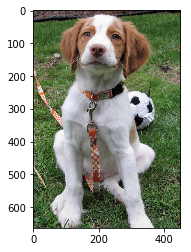

A dog is detected and its breed is Portuguese water dog


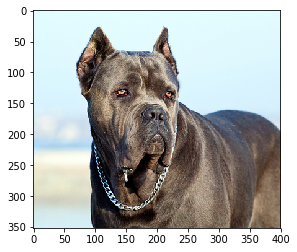

A dog is detected and its breed is English cocker spaniel


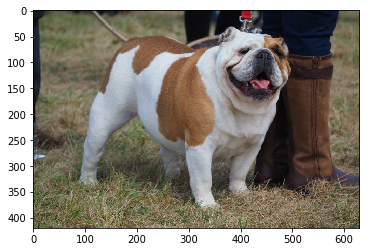

hello human
I think you look like a dog breed called Field spaniel


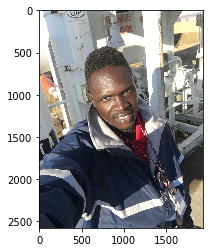

hello human
I think you look like a dog breed called Bullmastiff


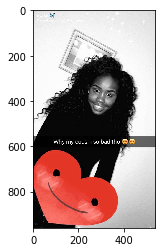

There's no dog or human detected in the image


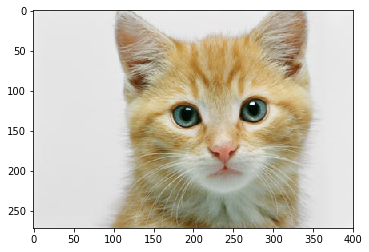

There's no dog or human detected in the image


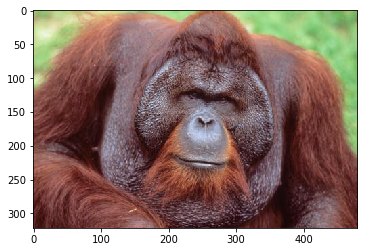

In [40]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
run_app("/home/workspace/dog_project/images/Brittany.jpg")
run_app("/home/workspace/dog_project/images/dog2.jpg")
run_app("/home/workspace/dog_project/images/dog1.jpg")

run_app("/home/workspace/dog_project/images/human1.JPG")
run_app("/home/workspace/dog_project/images/human2.JPG")

run_app("/home/workspace/dog_project/images/cat.jpg")
run_app("/home/workspace/dog_project/images/monkey.jpg")
